## Part A: Data Exploration & Preprocessing 

In [1]:
part_a = '''
Part A: Data Exploration & Preprocessing

• Data Loading:
  - Load the Breast Cancer dataset.
  - Handle any required header or column adjustments.

• Data Cleaning:
  - Check for missing or null values.
  - Handle missing values appropriately.
  - Drop non-informative ID columns.

• Feature Scaling:
  - Manually implement Min-Max Normalization or Standardization.
  - Scaling is essential for stable and fast Gradient Descent convergence.

• Exploratory Data Analysis:
  - Visualize class distribution (Malignant vs. Benign).
  - Explore feature correlations using simple plots.
'''

### Environment Setup

In [2]:
# =========================
# Environment Setup
# =========================

# Install required libraries, if not already installed
# !pip install pandas numpy matplotlib

In [3]:
# =========================
# Verify Installations
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Verify versions to ensure libraries are available
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)

NumPy version: 2.3.5
Pandas version: 2.3.3
Matplotlib version: 3.10.8


In [4]:
keep_self_in_loop = '''
• NumPy is required for mathematical operations and matrix computations.
• Pandas is used for data loading, inspection, and preprocessing.
• Matplotlib is used for visualization and learning curve plots.
• Versions are printed to confirm successful installation and imports.
'''

### Data Loading

In [5]:
# =========================
# Data Loading using Pandas
# =========================

# Load the Breast Cancer Wisconsin dataset
df = pd.read_csv("Wisconsin.csv")

# Display the first few rows of the dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
# shape of the dataset
df.shape

(569, 31)

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [8]:
keep_self_in_loop = '''
• The Breast Cancer dataset is loaded using pandas.read_csv().
• df.head() is used to preview the first few records.
• df.shape confirms the number of rows and columns.
• df.columns is checked to verify that meaningful column headers are present.
• No missing, unnamed, or misaligned headers were found, so no header adjustment is required.
'''

### Data Cleaning

In [9]:
# =========================
# Data Cleaning
# =========================

# Check for missing values / how many missing values per column?
df.isnull().sum()
df.isnull().sum().to_frame(name="MissingValues") # to frame for better scan

,MissingValues
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [10]:
# Check if `id` column exists and drop it
'''
- ID column says not informative for prediction, so drop it.
- First check if 'id' column exists, then drop it
'''
if 'id' in df.columns:
    df = df.drop(columns=['id'])

In [11]:
# Check data types of all columns
'''checking data types of all columns to ensure they are appropriate for analysis.'''

df.dtypes
df.dtypes.to_frame(name="DataType") # just to have a better scan of data types

,DataType
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


### Duplicate records check

In [12]:
# Check for duplicate records
df.duplicated().sum()

# np.int64(0) -> would mean no duplicate records found

np.int64(0)

### Statistical Sanity check

In [13]:
# Summary statistics to check for abnormal values
df.describe()

# Observations to be made from summary statistics:
# 1. No negative values are present in features that should only have positive values
#    (e.g., radius, area, perimeter cannot be negative in real life).

# 2. The minimum (min) and maximum (max) values look reasonable,
#    meaning there are no extremely strange or impossible numbers.

# 3. The mean (average) and median (50%) values are close to each other for many features,
#    which suggests the data is not heavily skewed.

# 4. Standard deviation (std) is not unusually large,
#    so the values are not wildly spread out.

# 5. Overall, the numbers fall within realistic ranges,
#    indicating the dataset does not contain obvious errors or outliers.


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
keep_self_in_loop = '''
• Checked for missing or null values across all columns; none were found.
• Verified presence of non-informative ID column and confirmed none exists in this dataset.
• Ensured all columns have appropriate numeric data types for mathematical operations.
• Checked for duplicate records and confirmed all rows are unique.
• Performed statistical sanity checks using summary statistics to detect abnormal or impossible values.
• Confirmed that feature values fall within realistic medical ranges with no obvious data errors.
• Overall, the dataset is clean, consistent, and suitable for further preprocessing and model training.
'''

### Feature Scaling

In [15]:
# Feature  Scaling means that all features are on a similar scale,
# which helps Gradient Descent converge faster and more reliably.

# Gradient Descent on the other hand means that we iteratively update our model parameters
# in the direction that reduces the error between our model's predictions and the actual labels.

# Feature scaling helps ensure that all features contribute equally to the distance calculations
# used in Gradient Descent, preventing features with larger scales from dominating the updates.

In [16]:
# Step 1: Choose Scaling Method
feature_scaling_types = '''
There are two common methods for feature scaling:
1. Min-Max Normalization:
   - Rescales features to a fixed range, usually [0, 1].
   - Formula: X_scaled = (X - X_min) / (X_max - X_min)
   - Preserves the shape of the original distribution.
2. Standardization (Z-score Normalization):
   - Centers features around mean 0 with standard deviation 1.
   - Formula: X_scaled = (X - mean) / std_dev
   - Useful when data follows a Gaussian distribution. (Gaussian Distribution is a bell-shaped curve that describes how data points are distributed around the mean.)
'''

# We choose Min-Max Normalization for this assignment.

In [17]:
# Step 1: Separate Features and Target

# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

X_an_y_separated = '''
Here,
We separate the dataset into features (X) and target variable (y).
- X contains all columns except 'target', representing the input features for the model.
- y contains only the 'target' column, representing the labels (Malignant or Benign) we want to predict.
'''

In [18]:
# Step 2: Compute Min and Max for Each Feature

min_values = X.min()
max_values = X.max()

computed_min_max ='''
Here,
We compute the minimum and maximum values for each feature in the dataset.
- min_values stores the minimum value of each feature column in X.
- max_values stores the maximum value of each feature column in X.
These values will be used to scale each feature to the [0, 1] range.

If you wonder how it will help scaling in range [0,1], here is the formula again:
X_scaled = (X - X_min) / (X_max - X_min). And if you want to imagine it visually:
For a feature value X:
- Subtracting X_min shifts the minimum value to 0.
- Dividing by (X_max - X_min) scales the maximum value to 1.
'''

In [19]:
# Step 3: Apply Min–Max Scaling Manually

# Apply Min-Max Normalization
X_scaled = (X - min_values) / (max_values - min_values)

scaled = '''
Here,
We have applied Min-Max Normalization to scale all features in X to the [0, 1] range.
This essential step ensures that all features contribute equally during model training,
preventing features with larger scales from dominating the learning process.

We have successfully scaled the features using Min-Max Normalization.
'''

In [20]:
# Step 4: Verify Scaling

X_scaled.describe()

verification = '''
To verify,
Just look at the summary statistics of the scaled features.
- The minimum (min) values for all features should be 0.
- The maximum (max) values for all features should be 1.
'''

In [21]:
keep_self_in_loop = '''
• Features and target variable were separated before scaling.
• Min–Max normalization was implemented manually using feature-wise minimum and maximum values.
• All features were scaled to the range [0, 1].
• Feature scaling ensures balanced gradient updates and improves Gradient Descent convergence.
'''

### Exploratory Data Analysis

#### EDA - Class Distribution (Malignant vs Benign)

In [23]:
# Step 1: Count each class
class_counts = y.value_counts()
class_counts

cc ='''
Here,
We count the occurrences of each class label in the target variable y.
Meaning,
- class_counts will show how many samples belong to each class (Malignant vs. Benign).
'''

class_counts

target
0    357
1    212
Name: count, dtype: int64

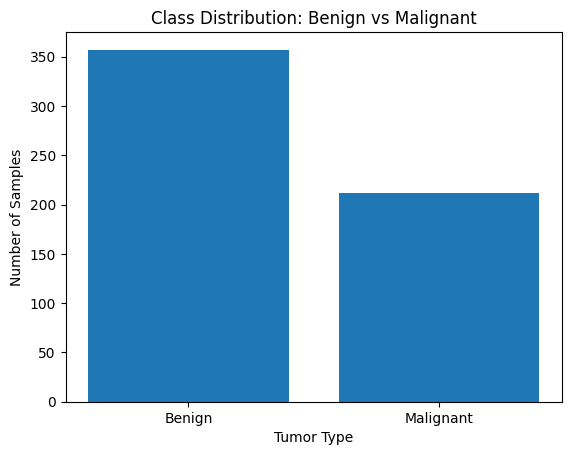

In [25]:
# Step 2: Visualize using a bar chart

# Plot class distribution
plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Tumor Type')
plt.ylabel('Number of Samples')
plt.title('Class Distribution: Benign vs Malignant')
plt.show()

things = '''
What these things mean:
Here,
We visualize the class distribution using a bar chart.
- figure(), helps create a new figure for the plot.
- bar() creates a bar chart with class labels on the x-axis and sample counts on the y-axis.
- xticks() sets the x-axis labels to 'Benign' and 'Malignant'.
- xlabel(), ylabel(), and title() add descriptive labels and title to the plot.
- show() displays the plot.
'''


In [28]:
EDA_1 = '''
- The dataset contains samples from both Benign and Malignant classes.
- Although the classes are not perfectly balanced, both are sufficiently represented.
- This distribution is suitable for training a binary classification model.
'''

#### EDA - Feature Correlation Exploration (Simple & Safe)

In [29]:
# Step 1: Compute correlation matrix

# Compute correlation matrix
corr_matrix = X.corr()

cm = '''Here,
We compute the correlation matrix for the features in X.
- corr() calculates pairwise correlation coefficients between features.
- The resulting corr_matrix shows how strongly each pair of features is linearly related.'''

corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


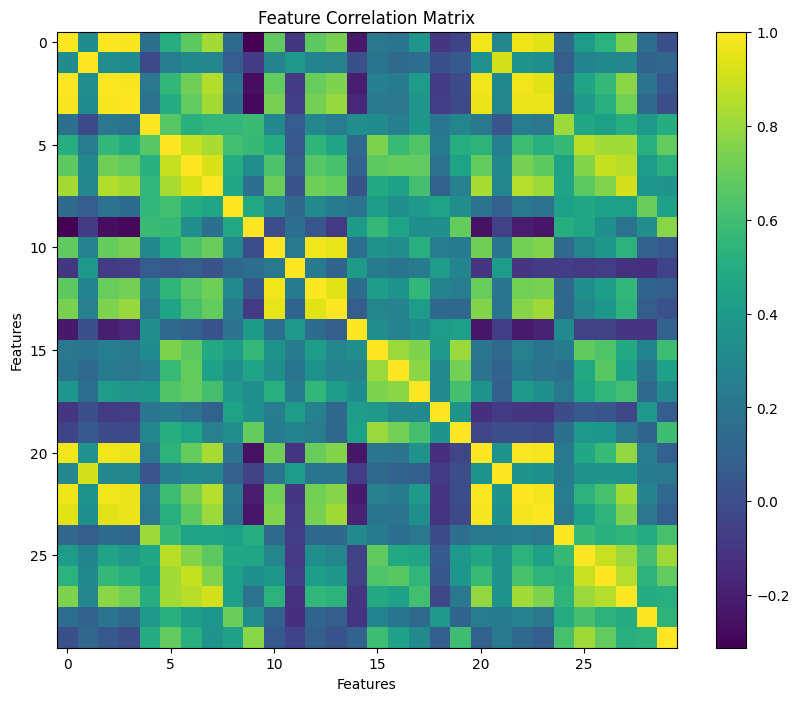

In [30]:
# Step 2: Visualize correlations using imshow

# Plot correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


In [ ]:
EDA_2 = '''
- Several features show strong positive correlations.
- This is expected, as related tumor measurements (e.g., radius, perimeter, area)
  are biologically connected.
- Logistic Regression can still handle correlated features effectively. 
Meaning, Logistic Regression is robust to multicollinearity, so correlated features do not significantly impact its performance.
- Logistic regression means that the model estimates the probability of a binary outcome (e.g., Malignant vs. Benign),
based on the input features, using the logistic function to map predicted values to probabilities between 0 and 1.
- In simple words, it predicts the likelihood of an event occurring based on the values of the input features.
'''